#Taller 3 Métodos Computacionales

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import warnings
import pandas as pd
from mpl_toolkits.mplot3d import axes3d

# Algebra Lineal

3. Implemente un algoritmo que realice la multiplicación de dos matrices. Use el algoritmo para calcular:


In [ ]:
A = np.array([[1,0,0],
              [5,1,0],
              [-2,3,1]])

B = np.array([[4,-2,1],
              [0,3,7],
              [0,0,2]])

In [ ]:
np.dot(A,B)

array([[ 4, -2,  1],
       [20, -7, 12],
       [-8, 13, 21]])

In [ ]:
def GetProduct(matriz1, matriz2):

    filas_matriz1 = len(matriz1)
    columnas_matriz1 = len(matriz1[0])
    filas_matriz2 = len(matriz2)
    columnas_matriz2 = len(matriz2[0])
    
    if columnas_matriz1 != filas_matriz2:
        return "No se pueden multiplicar las matrices"
    
    matriz_resultado = np.zeros((filas_matriz1,columnas_matriz2))
    
    for i in range(filas_matriz1):
        for j in range(columnas_matriz2):
            for k in range(filas_matriz2):
                matriz_resultado[i][j] += matriz1[i][k] * matriz2[k][j]
    
    return matriz_resultado

In [ ]:
GetProduct(A,B)

array([[ 4., -2.,  1.],
       [20., -7., 12.],
       [-8., 13., 21.]])

6. Successive over-relaxation (SOR) El método de sobre relajación sucesiva se basa en los métodos de Jacobi y Gauss-Seidel, pero incluye un parámetro de escala que reduce el error de aproximación en el paso (k).

Implemente este método para solucionar el sistema de ecuaciones de clase (5.4).

In [ ]:
def GetSOR(A, b, omega, tol, max_iters):
  n = len(b)
  x = np.zeros(n)
  iters = 0
  error = tol + 1
    
  while error > tol and iters < max_iters:
    x_old = np.copy(x)
        
    for i in range(n):
        sigma = 0

        for j in range(0,i):
            sigma += A[i, j] * x[j]

        for j in range(i+1, n):
            sigma += A[i, j] * x_old[j]
                
        x[i] = (1 - omega) * x_old[i] + (omega / A[i, i]) * (b[i] - sigma)
            
    error = np.linalg.norm(x - x_old)
    iters += 1

  return x, iters, error

A = np.array([[ 3.,  -1.,  -1.],
              [ -1.,  3.,  1.], 
              [2.,  1.,  4.]])
b = np.array([1.,3.,7.])
tolerancia = 1e-8
itmax = 10000
omega = 1

GetSOR(A, b, omega, tolerancia, itmax)

(array([1., 1., 1.]), 15, 5.8817860304262355e-09)

Encuentre el parámetro de relajación que minimiza el número de iteraciones para resolverlo.

In [ ]:
def GetParameter(A, b, tol, max_iters):
  comparar1 = np.inf
  comparar2 = np.inf

  w_ = np.linspace(1,2,100)

  for w in w_:

    solucion,count,error = GetSOR(A,b,w,tol,max_iters)

    if count < comparar1 and error < comparar2:
      comparar1 = count
      comparar2 = error
      parameter = w

  return parameter
warnings.filterwarnings('ignore')
print("Valor de omega que minimiza los pasos: {0}".format(GetParameter(A,b, tolerancia,itmax)))

Valor de omega que minimiza los pasos: 1.0


Adicionalmente, algo curioso es lo siguiente:

In [ ]:
w_ = np.linspace(1,2,100)
for w in w_:
  solucion , count, error = GetSOR(A,b, w, tolerancia,itmax)
  print(w, solucion, count, error)

1.0 [1. 1. 1.] 15 5.8817860304262355e-09
1.0101010101010102 [1. 1. 1.] 16 4.434884705000033e-09
1.02020202020202 [1. 1. 1.] 17 3.426228186643201e-09
1.0303030303030303 [1. 1. 1.] 17 9.60593605659058e-09
1.0404040404040404 [1. 1. 1.] 18 7.832342264032237e-09
1.0505050505050506 [1. 1. 1.] 19 6.757369463060516e-09
1.0606060606060606 [1. 1. 1.] 20 6.153040681651926e-09
1.0707070707070707 [1. 1. 1.] 21 5.899241099643898e-09
1.0808080808080809 [1. 1. 1.] 22 5.94226232021557e-09
1.0909090909090908 [1. 1. 1.] 23 6.276089357402755e-09
1.101010101010101 [1. 1. 1.] 24 6.937605078407132e-09
1.1111111111111112 [1. 1. 1.] 25 8.012654366165205e-09
1.121212121212121 [1. 1. 1.] 26 9.654017701430083e-09
1.1313131313131313 [1. 1. 1.] 28 5.795195265522795e-09
1.1414141414141414 [1. 1. 1.] 29 7.85693024010466e-09
1.1515151515151516 [1. 1. 1.] 31 5.692411807108749e-09
1.1616161616161615 [1. 1. 1.] 32 8.595305010825638e-09
1.1717171717171717 [1. 1. 1.] 34 7.406891073693084e-09
1.1818181818181819 [1. 1. 1.] 3

De lo anterior se puede observar que hay omegas en los que la solución diverge y el número de pasos simplemente se dispara. En efecto, a partir de 1.4129 hay una clara divergencia por resultados infinitos, indeterminados o muy grandes.

7. Implemente la descomposición LU para factorizar la siguiente matriz A = LU

In [ ]:
A = np.array([[4,-2,1]
            ,[20,-7,12]
            ,[-8,13,17]])

In [ ]:
def GetLU(A):
  A_ = np.array(A)
  dim = A_.shape
  L = np.zeros_like(A_)

  for j in range(0,dim[1]):
    # Toda la diagonal de L son unos
    L[j,j] = 1.0

    for i in range(j+1,dim[1]):
      # Coeficientes de la matriz L, se deja fijo j
      L[i,j] = A_[i,j]/A_[j,j]
    
      for kj in range(j,dim[1]):
        # Operaciones entre filas, se deja fijo i y j
        A_[i,kj] -= L[i,j]*A_[j,kj]

  # La matriz resultante es U
  U = A_

  return L,U

In [ ]:
L,U = GetLU(A)

In [ ]:
L,U

(array([[ 1,  0,  0],
        [ 5,  1,  0],
        [-2,  3,  1]]),
 array([[ 4, -2,  1],
        [ 0,  3,  7],
        [ 0,  0, -2]]))

In [ ]:
A == L @ U

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

9. Método de Jacobi: diagonalización de matrices simétricas.

(a) Implemente el método de Jacobi para encontrar los valores y vectores propios de:

In [ ]:
A = np.array([[ 4,  1,  1],
              [ 1,  3,  2],
              [ 1,  2,  5]])

In [ ]:
def GetJacobi(A,max_iter=1000):
    n = A.shape[0]
    D = np.copy(A) 
    V = np.identity(n) 
    iterations = 0

    while iterations < max_iter:
      max_off_diag = 0
      for i in range(n):
        for j in range(i+1, n):
          if D[i,j] > max_off_diag:
            max_off_diag = D[i,j]
            posicion_i = i
            posicion_j = j
          
      i = posicion_i
      j = posicion_j

      if D[i,i] == D[j,j]:
          theta = np.pi / 4
      
      else:
          value = (2 * D[i,j]) / (D[j,j] - D[i,i]) 
          if value >= 0:
              theta = 0.5 * np.arctan(value)
          if value <= 0:
              theta = 0.5 * np.arctan(value) + np.pi

      R = np.identity(n)
      R[i, i] = np.cos(theta)
      R[j, j] = np.cos(theta)
      R[i, j] = np.sin(theta)
      R[j, i] = -np.sin(theta)

      D = np.dot(np.dot(R.T, D), R)
      V = np.dot(V, R)

      iterations += 1

    EigValues = np.diag(D)
    EigVectors = V

    return EigValues, EigVectors

In [ ]:
GetJacobi(A)

(array([3.39729507, 1.70759841, 6.89510652]),
 array([[ 0.88573564,  0.17059871, -0.43170413],
        [-0.07589338, -0.86427949, -0.49725362],
        [-0.45794385,  0.47319874, -0.75257583]]))

(b) Compare con el resultado que se obtiene de Numpy: np.linalg.eig(A).

In [ ]:
np.linalg.eig(A)

(array([6.89510652, 3.39729507, 1.70759841]),
 array([[ 0.43170413,  0.88573564,  0.17059871],
        [ 0.49725362, -0.07589338, -0.86427949],
        [ 0.75257583, -0.45794385,  0.47319874]]))

10. Quantum system - ground state:

Implemente el algoritmo de la potencia inversa para encontrar el valor del estado base E0 y su vector propio.

In [ ]:
H = np.array([[ 1,  2,  -1],
              [ 1,  0,  1],
              [ 4,  -4,  5]])

In [ ]:
np.linalg.eig(H)

(array([3., 2., 1.]),
 array([[-0.23570226,  0.43643578,  0.40824829],
        [ 0.23570226, -0.21821789, -0.40824829],
        [ 0.94280904, -0.87287156, -0.81649658]]))

In [ ]:
def GetEigValue(A, c=0, itmax=1000, tolerancia=1e-16):

    n = A.shape[0]
    v0 = np.zeros(n)
    v0[c] = 1.
    lambda0 = np.inf
    
    A_inv = np.linalg.inv(A)
    
    for k in range(itmax):
        v1 = np.dot(A_inv, v0)
        lambda1 = v1[c] / v0[c]
        v1 = v1 / np.linalg.norm(v1)
        
        if np.abs(lambda1 - lambda0) < tolerancia:
            break
            
        lambda0 = lambda1
        v0 = v1

    eigvalue = 1/lambda0
    eigvector = v0

    return eigvalue, eigvector

In [ ]:
lambda0, v0 = GetEigValue(H)
lambda0, v0

(1.0000000000000002, array([ 0.40824829, -0.40824829, -0.81649658]))

11. Usando los métodos de Newton-Raphson y descenso del gradiente, encuentre la solución de los sistemas de ecuaciones no lineales dados.

Este punto no tocaba hacerlo, sólo fue hecho por curiosidad

In [ ]:
x,y,z = sym.symbols("x,y,z",real=True)

eq1 = sym.log(x**2+y**2) - sym.sin(x*y) - sym.log(2) - sym.log(sym.pi)
eq2 = sym.exp(x-y) + sym.cos(x*y)

def GetF(eq1, eq2, x0, y0):
  eq1_ = sym.lambdify([x,y],eq1,"numpy")(x0,y0)
  eq2_ = sym.lambdify([x,y],eq2,"numpy")(x0,y0)
  return np.array([eq1_, eq2_])

def GetJ(eq1,eq2,x0,y0):

  eq1_x = sym.lambdify([x,y],eq1.diff(x),"numpy")(x0,y0)
  eq1_y = sym.lambdify([x,y],eq1.diff(y),"numpy")(x0,y0)
  eq2_x = sym.lambdify([x,y],eq2.diff(x),"numpy")(x0,y0)
  eq2_y = sym.lambdify([x,y],eq2.diff(y),"numpy")(x0,y0)
  
  J = np.array([[eq1_x, eq1_y],
                [eq2_x, eq2_y]])

  return J

def GetNewtonRaphson(F,J,x0,y0,eq1,eq2,tolerancia,itmax):
  error = tolerancia + 1
  iters = 0

  vn = np.array([0.,0.])

  while error > tolerancia and iters < itmax:
    v0 = np.array([x0,y0])

    F_val = F(eq1, eq2, x0, y0)
    J_inv = np.linalg.inv(J(eq1, eq2, x0, y0))

    delta = np.dot(J_inv, F_val)
    vn = v0 - delta

    x0 = vn[0]
    y0 = vn[1]

    error = np.linalg.norm(delta)

    iters += 1

  return vn

In [ ]:
solucion = GetNewtonRaphson(GetF,GetJ,2.,2.,eq1,eq2,1e-10,1000)
solucion

array([1.77245385, 1.77245385])

In [ ]:
F = GetF(eq1, eq2, solucion[0],solucion[1])
F

array([3.33066907e-16, 0.00000000e+00])

In [ ]:
x,y,z = sym.symbols("x,y,z",real=True)

f1 = 6*x - 2*sym.cos(y*z) - 1
f2 = 9*y + sym.sqrt(x**2+sym.sin(z)+1.06) + 0.9 
f3 = 60*z + 3*sym.exp(-x*y) + 10*sym.pi - 3

G = sym.Matrix([f1,f2,f3])


def Jacobian(G):
  variables = [x,y,z]
  J = sym.zeros(3,3)

  for i in range(J.shape[0]):
    for j in range(J.shape[1]):
      func = G[i]
      dfunc = func.diff(variables[j])
      dfunc_ = sym.lambdify([x,y,z],dfunc,"numpy")

      J[i,j] = dfunc

  return J

J = Jacobian(G)

def GetGradient(G,J,x0,y0,z0,tolerancia,itmax,e):
  error = tolerancia + 1
  iters = 0

  G_ = sym.lambdify([x,y,z],G,"numpy")
  J_ = sym.lambdify([x,y,z],J,"numpy")

  solucion = np.array([0.,0.,0.])

  while error > tolerancia and iters < itmax:
    v0 = np.array([x0,y0,z0])

    G_val = G_(x0,y0,z0) 
    J_val = J_(x0,y0,z0)

    delta = np.dot(J_val.T, G_val)

    solucion = v0 - e*delta.T[0]

    x0 = solucion[0]
    y0 = solucion[1]
    z0 = solucion[2]

    error = np.linalg.norm(delta)

    iters += 1
  return solucion

In [ ]:
solucion = GetGradient(G,J,0,0,0,1e-10,10000,0.0001)
solucion

array([ 0.49814468, -0.1996059 , -0.52882598])

In [ ]:
J_ = sym.lambdify([x,y,z],J,"numpy")

In [ ]:
G_ = sym.lambdify([x,y,z],G,"numpy")
G_(solucion[0],solucion[1],solucion[2])

array([[-1.65647496e-11],
       [ 8.37441227e-13],
       [ 1.02140518e-14]])

12. (Jacobiano de cuarto orden) Usando el operador derivada central de orden O(h4) es posible mejorar la estimación del Jacobiano para funciones vectoriales.

(a) Escriba una función que estime el Jacobiano con el operador derivada de orden O(h4)


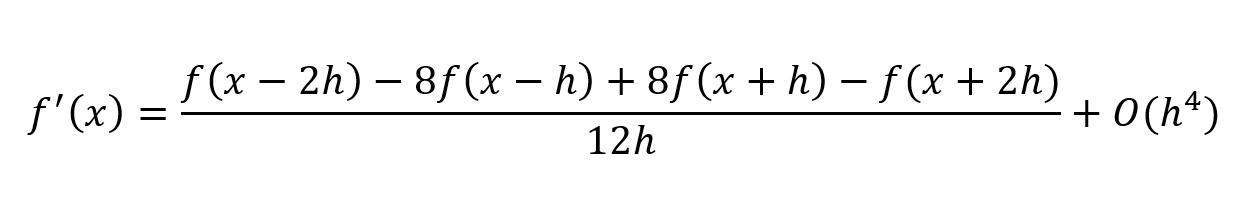

In [ ]:
# Para tres variables y tres funciones
f1_ = sym.lambdify([x,y,z],f1,"numpy")
f2_ = sym.lambdify([x,y,z],f2,"numpy")
f3_ = sym.lambdify([x,y,z],f3,"numpy")

func = np.array([f1_,f2_,f3_])

def Jacobian4Orden(func,x0,y0,z0,h):
  J = np.zeros((3,3))

  J[0,0] = (func[0](x0-2*h,y0,z0) - 8*func[0](x0-h,y0,z0) + 8*func[0](x0+h,y0,z0) - func[0](x0+2*h,y0,z0))/(12*h)
  J[0,1] = (func[0](x0,y0-2*h,z0) - 8*func[0](x0,y0-h,z0) + 8*func[0](x0,y0+h,z0) - func[0](x0,y0+2*h,z0))/(12*h)
  J[0,2] = (func[0](x0,y0,z0-2*h) - 8*func[0](x0,y0,z0-h) + 8*func[0](x0,y0,z0+h) - func[0](x0,y0,z0+2*h))/(12*h)

  J[1,0] = (func[1](x0-2*h,y0,z0) - 8*func[1](x0-h,y0,z0) + 8*func[1](x0+h,y0,z0) - func[1](x0+2*h,y0,z0))/(12*h)
  J[1,1] = (func[1](x0,y0-2*h,z0) - 8*func[1](x0,y0-h,z0) + 8*func[1](x0,y0+h,z0) - func[1](x0,y0+2*h,z0))/(12*h)
  J[1,2] = (func[1](x0,y0,z0-2*h) - 8*func[1](x0,y0,z0-h) + 8*func[1](x0,y0,z0+h) - func[1](x0,y0,z0+2*h))/(12*h)

  J[2,0] = (func[2](x0-2*h,y0,z0) - 8*func[2](x0-h,y0,z0) + 8*func[2](x0+h,y0,z0) - func[2](x0+2*h,y0,z0))/(12*h)
  J[2,1] = (func[2](x0,y0-2*h,z0) - 8*func[2](x0,y0-h,z0) + 8*func[2](x0,y0+h,z0) - func[2](x0,y0+2*h,z0))/(12*h)
  J[2,2] = (func[2](x0,y0,z0-2*h) - 8*func[2](x0,y0,z0-h) + 8*func[2](x0,y0,z0+h) - func[2](x0,y0,z0+2*h))/(12*h)

  return J

(b) Estime el Jacobiano de la función del problema anterior en el punto x =(0.5, 0.5, 0.5) con h = 0.01.


In [ ]:
J_a = Jacobian4Orden(func,0.5,0.5,0.5,1e-2)
det_Ja = np.linalg.det(J_a)

J_a, det_Ja

(array([[ 6.        ,  0.24740396,  0.24740396],
        [ 0.37377753,  9.        ,  0.32802064],
        [-1.16820117, -1.16820117, 60.        ]]),
 3239.149048516114)

In [ ]:
J_b = J_(0.5,0.5,0.5)
det_Jb = np.linalg.det(J_b)
J_b, det_Jb

(array([[ 6.        ,  0.24740396,  0.24740396],
        [ 0.37377753,  9.        ,  0.32802064],
        [-1.16820117, -1.16820117, 60.        ]]),
 3239.1490485004633)

In [ ]:
error1a, error1b = np.abs(J_a - J_b), np.abs(det_Jb - det_Ja)
error1a, error1b

(array([[5.32907052e-15, 5.15434917e-12, 5.15434917e-12],
        [1.01521719e-09, 1.42108547e-14, 4.56234495e-11],
        [2.43236542e-11, 2.43236542e-11, 2.62900812e-13]]),
 1.565058482810855e-08)

(c) Estime el Jacobiano usando la aproximación de orden O(h2) con h = 0.01.

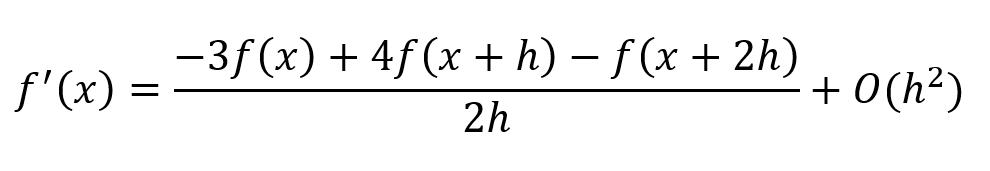

In [ ]:
def Jacobian2Orden(func,x0,y0,z0,h):
  J = np.zeros((3,3))

  J[0,0] = (-3*func[0](x0,y0,z0) + 4*func[0](x0+h,y0,z0) - func[0](x0+2*h,y0,z0))/(2*h)
  J[0,1] = (-3*func[0](x0,y0,z0) + 4*func[0](x0,y0+h,z0) - func[0](x0,y0+2*h,z0))/(2*h)
  J[0,2] = (-3*func[0](x0,y0,z0) + 4*func[0](x0,y0,z0+h) - func[0](x0,y0,z0+2*h))/(2*h)

  J[1,0] = (-3*func[1](x0,y0,z0) + 4*func[1](x0+h,y0,z0) - func[1](x0+2*h,y0,z0))/(2*h)
  J[1,1] = (-3*func[1](x0,y0,z0) + 4*func[1](x0,y0+h,z0) - func[1](x0,y0+2*h,z0))/(2*h)
  J[1,2] = (-3*func[1](x0,y0,z0) + 4*func[1](x0,y0,z0+h) - func[1](x0,y0,z0+2*h))/(2*h)

  J[2,0] = (-3*func[2](x0,y0,z0) + 4*func[2](x0+h,y0,z0) - func[2](x0+2*h,y0,z0))/(2*h)
  J[2,1] = (-3*func[2](x0,y0,z0) + 4*func[2](x0,y0+h,z0) - func[2](x0,y0+2*h,z0))/(2*h)
  J[2,2] = (-3*func[2](x0,y0,z0) + 4*func[2](x0,y0,z0+h) - func[2](x0,y0,z0+2*h))/(2*h)

  return J

In [ ]:
J_c = Jacobian2Orden(func,0.5,0.5,0.5,1e-2)
det_Jc = np.linalg.det(J_c)

J_c, det_Jc

(array([[ 6.        ,  0.24740605,  0.24740605],
        [ 0.37379558,  9.        ,  0.32802517],
        [-1.16819148, -1.16819148, 60.        ]]),
 3239.1487401658574)

In [ ]:
J_b

array([[ 6.        ,  0.24740396,  0.24740396],
       [ 0.37377753,  9.        ,  0.32802064],
       [-1.16820117, -1.16820117, 60.        ]])

In [ ]:
error2a, error2b = np.abs(J_c - J_b), np.abs(det_Jc - det_Jb)
error2a, error2b

(array([[5.32907052e-15, 2.09195999e-06, 2.09195999e-06],
        [1.80475798e-05, 1.42108547e-14, 4.52700880e-06],
        [9.69858859e-06, 9.69858859e-06, 1.27897692e-12]]),
 0.0003083346059611358)

In [ ]:
error1b, error2b # Errores en el determinante de las matrices

(1.565058482810855e-08, 0.0003083346059611358)

Para qué valor de h, el operador de segundo orden igualará en precisión al operador de cuarto orden; verifique su intuición en el código.

In [ ]:
J1 = Jacobian2Orden(func,0.5,0.5,0.5,1e-0)
J2 = Jacobian4Orden(func,0.5,0.5,0.5,1e-0)

error1 = np.abs(J1-J_b)
error2 = np.abs(J2-J_b)

In [ ]:
for i in range(0,21):
  h = 10**(-i)

  J1 = Jacobian2Orden(func,0.5,0.5,0.5,h)
  J2 = Jacobian4Orden(func,0.5,0.5,0.5,h)

  detJ1 = np.linalg.det(J1)
  detJ2 = np.linalg.det(J2)

  error1 = np.abs(detJ1-det_Jb)
  error2 = np.abs(detJ2-det_Jb) 

  print ("\n Error orden 2: {0}, \n Error orden 4: {1}, \n h = {2} ".format(error1,error2,h))


 Error orden 2: 2.9502260122035295, 
 Error orden 4: 0.630179102850434, 
 h = 1 

 Error orden 2: 0.03192455701446306, 
 Error orden 4: 0.0001548724985696026, 
 h = 0.1 

 Error orden 2: 0.0003083346059611358, 
 Error orden 4: 1.565058482810855e-08, 
 h = 0.01 

 Error orden 2: 3.068846126552671e-06, 
 Error orden 4: 4.0472514228895307e-11, 
 h = 0.001 

 Error orden 2: 3.177319740643725e-08, 
 Error orden 4: 3.396962711121887e-10, 
 h = 0.0001 

 Error orden 2: 1.3018734534853138e-07, 
 Error orden 4: 1.371745383949019e-08, 
 h = 1e-05 

 Error orden 2: 7.424987416015938e-07, 
 Error orden 4: 2.5674989956314676e-07, 
 h = 1e-06 

 Error orden 2: 1.6774575669842307e-05, 
 Error orden 4: 7.95538971942733e-06, 
 h = 1e-07 

 Error orden 2: 8.339329269801965e-06, 
 Error orden 4: 3.8956612115725875e-05, 
 h = 1e-08 

 Error orden 2: 0.0010706893835958908, 
 Error orden 4: 0.0006026791556905664, 
 h = 1e-09 

 Error orden 2: 0.0062818123437864415, 
 Error orden 4: 0.0026238477144033823, 


Parece ser que en h = 1e-06 el operador de segundo orden iguala en precisión al operador de cuarto orden. Esto pasa al comparar el cálculo del determinante.

In [ ]:
J1 = Jacobian2Orden(func,0.5,0.5,0.5,1e-06)
J2 = Jacobian4Orden(func,0.5,0.5,0.5,1e-06)

error1 = np.abs(J1-J_b)
error2 = np.abs(J2-J_b)

error1, error2

(array([[4.95106178e-11, 1.57352992e-10, 1.57352992e-10],
        [1.20525107e-09, 3.69823283e-10, 6.78820611e-10],
        [1.27332935e-08, 1.27332935e-08, 1.64823177e-08]]),
 array([[4.95106178e-11, 4.63306893e-11, 4.63306893e-11],
        [5.30017141e-11, 5.18355137e-10, 5.79432169e-10],
        [4.44362835e-09, 4.44362835e-09, 1.08722986e-09]]))

Cuando comparamos los componentes matriciales podemos notar en la mayoría de estos que la precisión es muy similar o igual.

13. (Group theory, Sympy) El grupo de rotación SO(3) (special orthogonal dim 3) describe las rotaciones en el espacio. Este grupo tiene el siguiente conjunto de generadores:

In [ ]:
Jx = sym.Matrix([[0,0,0],
               [0,0,-1],
               [0,1,0]])

Jy = sym.Matrix([[0,0,1],
               [0,0,0],
               [-1,0,0]])

Jz = sym.Matrix([[0,-1,0],
               [1,0,0],
               [0,0,0]])

In [ ]:
SO3 = [Jx,Jy,Jz]
SO3

[Matrix([
 [0, 0,  0],
 [0, 0, -1],
 [0, 1,  0]]),
 Matrix([
 [ 0, 0, 1],
 [ 0, 0, 0],
 [-1, 0, 0]]),
 Matrix([
 [0, -1, 0],
 [1,  0, 0],
 [0,  0, 0]])]

In [ ]:
def GetLeiviCivita(i,j,k):

  if ((i,j,k) == (1,2,3) or
      (i,j,k) == (2,3,1) or
      (i,j,k) == (3,1,2)):
    sign = 1
  
  elif ((i,j,k) == (3,2,1) or
      (i,j,k) == (1,3,2) or
      (i,j,k) == (2,1,3)):
    sign = -1

  else:
    sign = 0

  return sign

In [ ]:
def GetConmutadorLie(C,i,j,k):
  sign = GetLeiviCivita(i,j,k)
  k = k-1
  return sign * SO3[k]

def GetConmutador(C,i,j):
  return SO3[i-1]*SO3[j-1] - SO3[j-1]*SO3[i-1]

In [ ]:
"""Para que funcione, k != i, k!=j porque GetConmutadorLie se hace 0,
mientras que GetConmutador cuando i != j da otra cosa al no depender
de la letra k"""

i, j, k = 1, 2, 3

In [ ]:
GetConmutador(SO3,i,j)

Matrix([
[0, -1, 0],
[1,  0, 0],
[0,  0, 0]])

In [ ]:
GetConmutadorLie(SO3,i,j,k)

Matrix([
[0, -1, 0],
[1,  0, 0],
[0,  0, 0]])

In [ ]:
GetConmutador(SO3,i,j) == GetConmutadorLie(SO3,i,j,k)

True

In [ ]:
for i in range(3):
  for j in range(3):
    for k in range(3):
      if k!=i and k!=j:
        Conmutador = GetConmutador(SO3,i+1,j+1)
        Lie = GetConmutadorLie(SO3,i+1,j+1,k+1)
        print(i,j,k)
        print(Conmutador == Lie)

0 0 1
True
0 0 2
True
0 1 2
True
0 2 1
True
1 0 2
True
1 1 0
True
1 1 2
True
1 2 0
True
2 0 1
True
2 1 0
True
2 2 0
True
2 2 1
True


Se puede observar que para valores de $i$ y $j$ con $k \neq i$ y $k \neq j$, la igualdad se cumple

14. (Group theory, Sympy) El grupo de rotación SU(2) (special unitary dim 2) describe el operador de espín para una partícula fundamental con s=1/2. Este grupo tiene el siguiente conjunto de generadores:

In [ ]:
sigmax = sym.Matrix([[0,1],[1,0]])

sigmay = sym.Matrix([[0,-1j], [1j,0]])

sigmaz = sym.Matrix([[1,0],[0,-1]])

SU2 = [sigmax, sigmay, sigmaz]

In [ ]:
def GetConmutadorLie(C,i,j,k):
  sign = GetLeiviCivita(i,j,k)
  return sign * C[k-1] * 2j

def GetConmutador(C,i,j):
  return C[i-1]*C[j-1] - C[j-1]*C[i-1]

In [ ]:
"""Para que funcione, k != i, k!=j porque GetConmutadorLie se hace 0,
mientras que GetConmutador cuando i != j da otra cosa al no depender
de la letra k"""

i, j, k = 3, 2, 1

In [ ]:
GetConmutador(SU2,i,j)

Matrix([
[     0, -2.0*I],
[-2.0*I,      0]])

In [ ]:
GetConmutadorLie(SU2,i,j,k)

Matrix([
[     0, -2.0*I],
[-2.0*I,      0]])

In [ ]:
GetConmutador(SU2,i,j) == GetConmutadorLie(SU2,i,j,k)

True

In [ ]:
for i in range(3):
  for j in range(3):
    for k in range(3):
      if k!=i and k!=j:
        Conmutador = GetConmutador(SU2,i+1,j+1)
        Lie = GetConmutadorLie(SU2,i+1,j+1,k+1)
        print(i,j,k)
        print(Conmutador == Lie)

0 0 1
True
0 0 2
True
0 1 2
True
0 2 1
True
1 0 2
True
1 1 0
True
1 1 2
True
1 2 0
True
2 0 1
True
2 1 0
True
2 2 0
True
2 2 1
True


Se puede observar que para valores de $i$ y $j$ con $k \neq i$ y $k \neq j$, la igualdad se cumple

15. (Particle Physics, Sympy) La matrices de Dirac son una representación del álgebra de Clifford, que transforman correctamente el espacio de espinores de la teoría cuántica de campos:

In [ ]:
gamma0 = sym.Matrix([[1,0,0,0],
                    [0,1,0,0],
                    [0,0,-1,0],
                    [0,0,0,-1]])

gamma1 = sym.Matrix([[0,0,0,1],
                    [0,0,1,0],
                    [0,-1,0,0],
                    [-1,0,0,0]])

gamma2 = sym.Matrix([[0,0,0,-1j],
                    [0,0,1j,0],
                    [0,1j,0,0],
                    [-1j,0,0,0]])

gamma3 = sym.Matrix([[0,0,1,0],
                    [0,0,0,-1],
                    [-1,0,0,0],
                    [0,1,0,0]])

In [ ]:
Dirac = [gamma0,gamma1,gamma2,gamma3]
Dirac

[Matrix([
 [1, 0,  0,  0],
 [0, 1,  0,  0],
 [0, 0, -1,  0],
 [0, 0,  0, -1]]),
 Matrix([
 [ 0,  0, 0, 1],
 [ 0,  0, 1, 0],
 [ 0, -1, 0, 0],
 [-1,  0, 0, 0]]),
 Matrix([
 [     0,     0,     0, -1.0*I],
 [     0,     0, 1.0*I,      0],
 [     0, 1.0*I,     0,      0],
 [-1.0*I,     0,     0,      0]]),
 Matrix([
 [ 0, 0, 1,  0],
 [ 0, 0, 0, -1],
 [-1, 0, 0,  0],
 [ 0, 1, 0,  0]])]

In [ ]:
def GetConmutadorClifford(C,u,v):
  n_uv = [1,-1,-1,-1]
  
  if u == v:
    sign = n_uv[u]
  else:
    sign = 0

  I4 = sym.Matrix([[1,0,0,0],
                  [0,1,0,0],
                  [0,0,1,0],
                  [0,0,0,1]])
  
  return 2 * sign * I4

def GetConmutador2(C,u,v):
  return C[u]*C[v] + C[v]*C[u]

In [ ]:
GetConmutador2(Dirac,0,0)

Matrix([
[2, 0, 0, 0],
[0, 2, 0, 0],
[0, 0, 2, 0],
[0, 0, 0, 2]])

In [ ]:
GetConmutadorClifford(Dirac,0,0)

Matrix([
[2, 0, 0, 0],
[0, 2, 0, 0],
[0, 0, 2, 0],
[0, 0, 0, 2]])

In [ ]:
GetConmutador2(Dirac,0,0) == GetConmutadorClifford(Dirac,0,0)

True

In [ ]:
for u in range(4):
  for v in range(4):
    Conmutador = GetConmutador2(Dirac,u,v)
    Clifford = GetConmutadorClifford(Dirac,u,v)
    print(u,v)
    print(Conmutador == Clifford)

0 0
True
0 1
True
0 2
True
0 3
True
1 0
True
1 1
True
1 2
True
1 3
True
2 0
True
2 1
True
2 2
True
2 3
True
3 0
True
3 1
True
3 2
True
3 3
True


Se puede observar que para cualquier valor de $u$ y $v$, la igualdad se cumple

# Mínimos Cuadrados

1. Se tienen tres líneas en R2:

In [ ]:
y1 = lambda x: 2*x - 2
y2 = lambda x: (1-x)/2
y3 = lambda x: 4 - x

x_ =  np.linspace(-10,10,1000)

(a) Con el método de mínimos cuadrados encuentre el punto común a las tres líneas. Grafique las tres líneas y el punto solución, ¿qué interpretación puede dar?

In [ ]:
A = np.array([[2,-1],
              [1,2],
              [1,1]])

b = np.array([2,1,4])

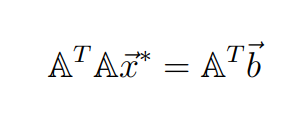

In [ ]:
# Calcular la matriz transpuesta de A
A_T = A.T

# Calcular A_T * A
A_T_A = np.dot(A_T, A)

# Calcular A_T * b
A_T_b = np.dot(A_T, b)

# Resolver el sistema de ecuaciones lineales A_T * A * x = A_T * b
x = np.linalg.solve(A_T_A, A_T_b)

In [ ]:
x_sol = x[0]
y_sol = x[1]
x

array([1.42857143, 0.42857143])

In [ ]:
np.linalg.lstsq(A,b)[0]

array([1.42857143, 0.42857143])

Text(0.5, 1.0, 'Mínimos Cuadrados - Punto Común')

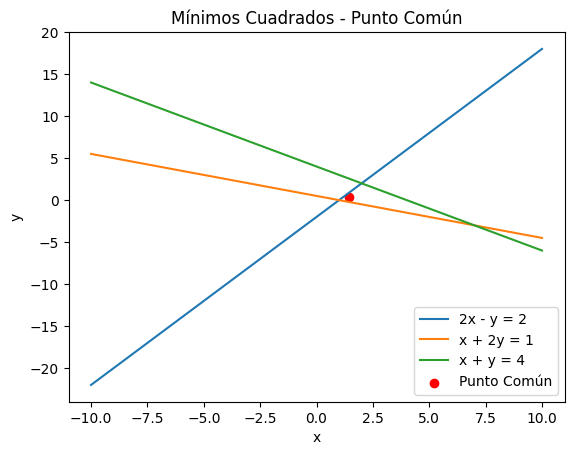

In [ ]:
plt.plot(x_, y1(x_), label='2x - y = 2')
plt.plot(x_, y2(x_), label='x + 2y = 1')
plt.plot(x_, y3(x_), label='x + y = 4')
plt.scatter(x_sol, y_sol, color='red', marker='o', label='Punto Común')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mínimos Cuadrados - Punto Común')

El punto común hallado anteriormente se puede interpretar como el punto que minimiza la distancia entre las tres rectas

(b) Realice una búsqueda iterativa entre −5 ≤ x ≤ 5 y −5 ≤ y ≤ 5 con un paso de h = 0.01 para encontrar la menor distancia del problema. Grafique la distancia y compare con el resultado obtenido con mínimos cuadrados.

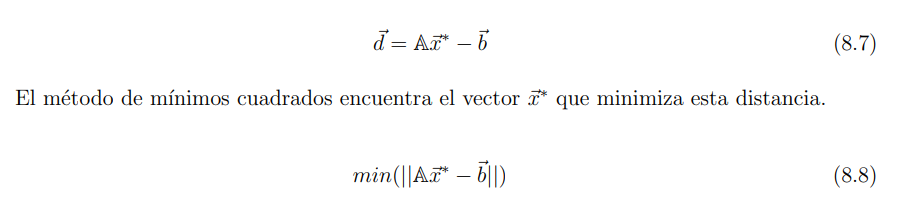

In [ ]:
from tqdm import tqdm

x_new = np.arange(-5,5,0.01)
y_new = np.arange(-5,5,0.01)
vector = np.zeros((2))
comparador = np.inf

distancias = np.zeros((len(x_new),len(y_new)))

for i in tqdm(range(len(x_new))):
  for j in range(len(y_new)):
    x_vector = np.array([x_new[i],y_new[j]])
    distancia = np.linalg.norm(np.dot(A,x_vector) - b)
    distancias[i,j] = distancia

    if distancia < comparador:
      comparador = distancia
      vector = x_vector
      

vector

100%|██████████| 1000/1000 [00:15<00:00, 62.73it/s]


array([1.43, 0.43])

In [ ]:
vector, x

(array([1.43, 0.43]), array([1.42857143, 0.42857143]))

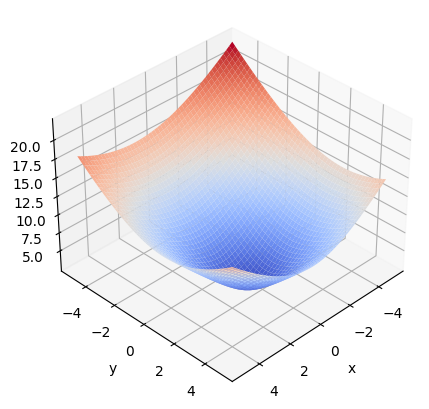

In [ ]:
fig = plt.figure(figsize=(5,5))
X_ , Y_ = np.meshgrid(x_new,y_new)
ax = fig.add_subplot(111,projection='3d',xlabel="x",ylabel="y",zlabel="z")
ax.view_init(elev=35,azim=45)
ax.plot_surface(X_,Y_,distancias, cmap = "coolwarm")
plt.show()

El método de hallar la mínima distancia es más inexacto.

7. (Machine Learning: Logistic Regresion) Descargue los datos de: https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv

In [ ]:
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv"
DataFrame = pd.read_csv(url,sep=",",engine='python')
X=np.array(DataFrame["x"])
Y=np.array(DataFrame["y"])

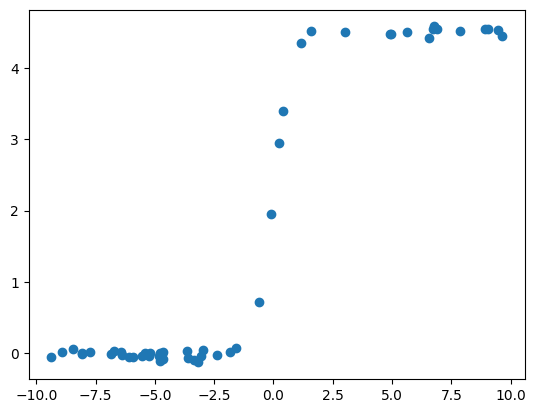

In [ ]:
plt.scatter(X,Y)

In [ ]:
theta0, theta1, theta2, x = sym.symbols("theta0, theta1, theta2, x", real=True)

In [ ]:
def Model():
  return theta0 / (theta1 + sym.exp(-theta2*x))

def GetGradient():
  Model_x = sym.diff(Model(), theta0)
  Model_y = sym.diff(Model(), theta1)
  Model_z = sym.diff(Model(), theta2)

  Model_x_ = sym.lambdify([x,theta0,theta1,theta2], Model_x)
  Model_y_ = sym.lambdify([x,theta0,theta1,theta2], Model_y)
  Model_z_ = sym.lambdify([x,theta0,theta1,theta2], Model_z)

  return Model_x_, Model_y_, Model_z_

def GetSolution(Model,x,y,theta,tolerancia,itmax,gamma):
  error = tolerancia + 1
  iters = 0
  Model_x, Model_y, Model_z = GetGradient()

  while error > tolerancia and iters < itmax:
    sigma = 0

    for i in range(len(y)):
      Modelx = Model_x(x[i],theta[0], theta[1], theta[2])
      Modely = Model_y(x[i],theta[0], theta[1], theta[2])
      Modelz = Model_z(x[i],theta[0], theta[1], theta[2])

      sigma += (y[i]-Model(x[i],theta[0],theta[1],theta[2]))*np.array([Modelx,Modely,Modelz])
    
    criteria = gamma * (-2*sigma)
    theta_new = theta - criteria
    theta = theta_new

    error = np.linalg.norm(criteria)
    iters += 1

  return theta_new

Model_ = sym.lambdify([x,theta0,theta1,theta2],Model())
theta = np.array([1,1,1])
gamma = 1e-3
tolerancia = 0.01
itmax = 10000

In [ ]:
theta_solution = GetSolution(Model_,X,Y,theta,tolerancia,itmax,gamma)

In [ ]:
Reduced_Model = Model().subs([(theta0, theta_solution[0]), 
                              (theta1, theta_solution[1]),
                              (theta2, theta_solution[2])]) 

Reduced_Model

2.13697217430653/(0.458338457725023 + exp(-1.23608938541062*x))

In [ ]:
Reduced_Model_ = sym.lambdify([x],Reduced_Model)

In [ ]:
X_ = np.linspace(np.min(X),np.max(X),1000)
Y_ = Reduced_Model_(X_)

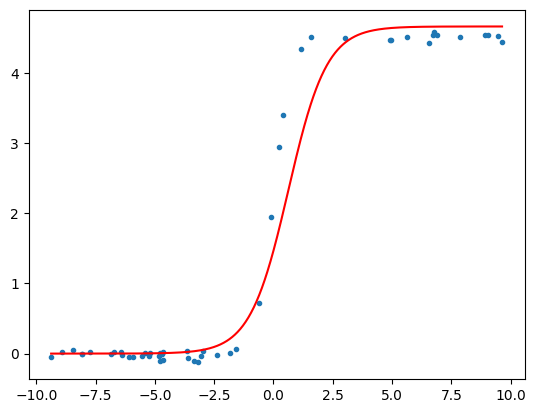

In [ ]:
plt.plot(X_,Y_, color="red")
plt.scatter(X,Y,marker=".")